# Scene Classification using CNN 


This Data contains around 25k images of size 150x150 distributed under 6 categories. <br>

{'buildings' -> 0, <br>
'forest' -> 1, <br>
'glacier' -> 2, <br>
'mountain' -> 3, <br>
'sea' -> 4, <br>
'street' -> 5 } <br>

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.




https://www.kaggle.com/puneet6060/intel-image-classification


In [1]:
import matplotlib.pyplot as plt 
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder



In [3]:


#train and test data directory
data_dir = "scenes-db/seg_train/seg_train/"
test_data_dir = "scenes-db/seg_test/seg_test"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((150,150)),transforms.ToTensor()
]))

### Check for GPU 

In [4]:
#Check if GPU is available
...

Device: cpu


In [5]:
img, label = dataset[0]
print(img.shape,label)
print("Follwing classes are there : \n",dataset.classes)

torch.Size([3, 150, 150]) 0
Follwing classes are there : 
 ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


Label : buildings


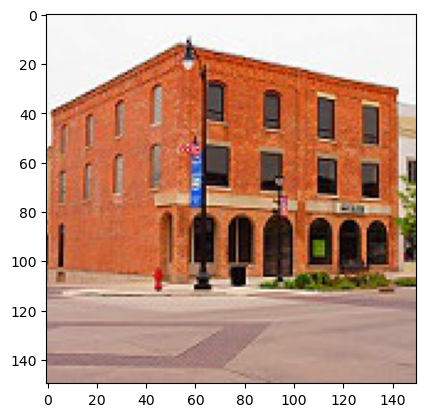

In [6]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[10])

## Define Data loader 

In [7]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 2000
train_size = len(dataset) - val_size 


# create train data and validation data
train_data,val_data = ...
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#deine data loaders here. Load the train and validation into batches.
train_dl = ...
val_dl = ...

Length of Train Data : 12034
Length of Validation Data : 2000


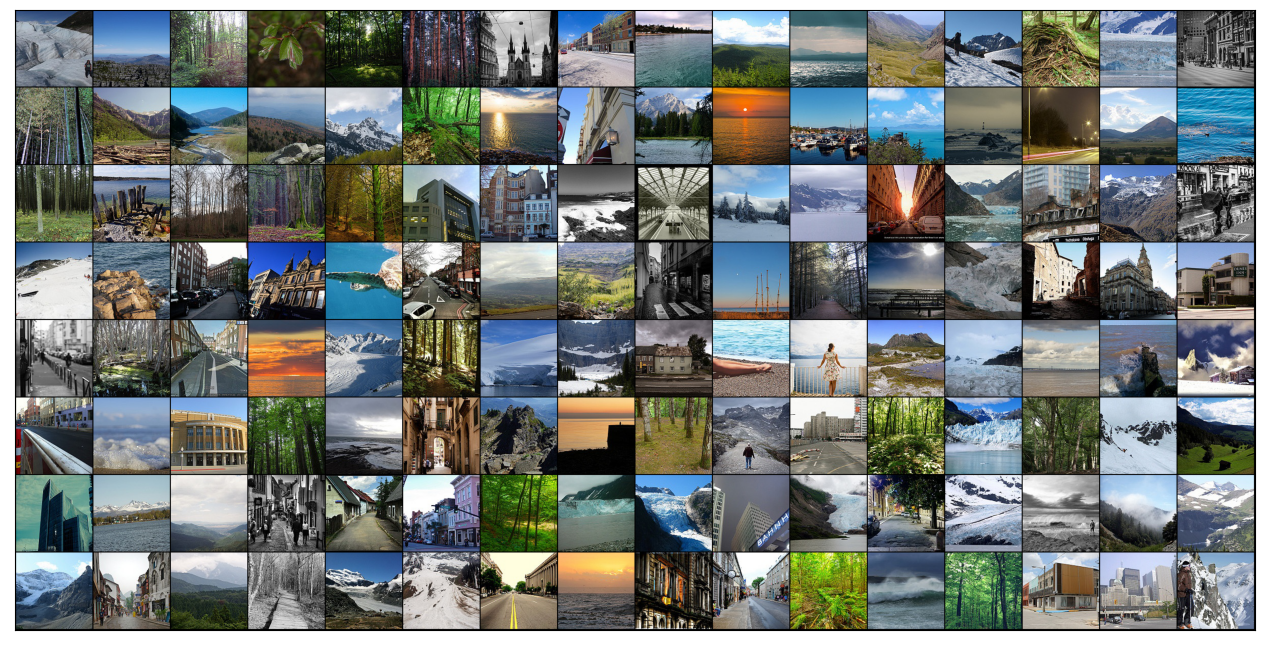

In [8]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [9]:
import torch.nn as nn
import torch.nn.functional as F

## Define model

Define model <br> 
train and Evaluate!! 

One possible network configuraiton could be <br>
Conv2d [3,32] -> ReLU -> Conv[32,64] -> RelU -> MaxPool [2,2] -> Conv[64,128] -> ReLU -> Conv[128,128] -> ReLU -> MaxPool -> Conv [128,256] -> ReLU -> Conv [256,256] -> ReLU -> MAxPool -> Flatten -> Linear [82944,1024] -> ReLU -> Linear [1024, 512] -> ReLU -> Linear [512,6]

NaturalSceneClassification(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=82944, out_features=1024, bias=True)
    (17): ReLU()
    (18): Li